In [1]:
# EVALUATION OF CROP-YIELD USING MULTIPLE LINEAR REGRESSION (MLR) MODEL

# Importing Necessary Packages
import pandas as pd
from sklearn import linear_model
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import numpy as np

# Importing Data
path = "data.xlsx"
filedata = pd.read_excel(path)
df = pd.DataFrame(filedata)
df

,Rain Fall (mm),Fertilizer(urea) (kg/acre),Temperature (°C),Nitrogen (N),Phosphorus (P),Potassium (K),Yield (Q/acre)
0,1230,80,28,80,24,20,12.0
1,480,60,36,70,20,18,8.0
2,1250,75,29,78,22,19,11.0
3,450,65,35,70,19,18,9.0
4,1200,80,27,79,22,19,11.0
...,...,...,...,...,...,...,...
94,1250,77,28,78,23,20,9.0
95,425,60,39,65,19,17,6.5
96,1220,79,28,77,23,21,10.5
97,480,65,36,68,21,16,7.0


In [2]:
# Applying normalization techniques
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(df)
normalized_dataframe = pd.DataFrame(normalized_data)
normalized_dataframe.columns = ["Rain Fall (mm)", "Fertilizer(urea) (kg/acre)", "Temperature (°C)", "Nitrogen (N)", "Phosphorus (P)", "Potassium (K)", "Yield (Q/acre)"]
x = normalized_dataframe[["Rain Fall (mm)", "Fertilizer(urea) (kg/acre)", "Temperature (°C)", "Nitrogen (N)", "Phosphorus (P)", "Potassium (K)"]]
y = normalized_dataframe["Yield (Q/acre)"]

In [3]:
# With sklearn Package
regr = linear_model.LinearRegression()
regr.fit(x, y)
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 0.5179387775662458
Coefficients: 
 [-0.08034699 -0.12577111 -0.46354152  0.33380557  0.12422822  0.32968384]


In [4]:
# with statsmodels
x = sm.add_constant(x)  # adding a constant
model = sm.OLS(y, x).fit()
predictions = model.predict(x)
print("\nThe Predicted Output are : ")
print(predictions)
print_model = model.summary()
print(print_model)


The Predicted Output are : 
0     0.877960
1     0.472854
2     0.753782
3     0.465795
4     0.811122
        ...   
94    0.839214
95    0.246528
96    0.864709
97    0.343653
98    0.877960
Length: 99, dtype: float64
                            OLS Regression Results                            
Dep. Variable:         Yield (Q/acre)   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.878
Method:                 Least Squares   F-statistic:                     118.7
Date:                Tue, 18 Jul 2023   Prob (F-statistic):           4.32e-41
Time:                        17:51:19   Log-Likelihood:                 85.740
No. Observations:                  99   AIC:                            -157.5
Df Residuals:                      92   BIC:                            -139.3
Df Model:                           6                                         
Covariance Type:            nonrobust                               

In [5]:
# Calculating Evaluation Metrics

# Mean Square Error (MSE)
difference = predictions - y
print("\n The Difference Between Predicted Output & Actual Output is : ")
print(difference)
summation = 0
for i in range(0, len(predictions)):
    difference_MSE = predictions[i] - y[i]
    squared_difference = difference_MSE ** 2
    summation = summation + squared_difference
MSE = summation / (len(predictions))
print(f"\nMSE of this Model is : {MSE}")

# Root Mean Square Error (RMSE)
RMSE = MSE ** 0.5
print(f"\nRMSE of this Model is : {RMSE}")

# Normalized Root Mean Square Error (NRMSE)
NRMSE = RMSE/(difference.max() - difference.min())
print(f"\nNRMSE of this Model is : {NRMSE}")

# Mean Absolute Error (MAE)
sum_MAE = 0
for i in range(0, len(predictions)):
    difference_MAE = predictions[i] - y[i]
    sum_MAE = sum_MAE + abs(difference_MAE)
MAE = sum_MAE / (len(predictions))
print(f"\nMAE of this Model is : {MAE}")

# calculate mean absolute percentage error (MAPE) or R^2 and display accuracy
MAPE = 100 * (MAE / df['Yield (Q/acre)'])
accuracy = 100 - np.mean(MAPE)
print('Accuracy (R^2):', round(accuracy, 4), '%.')


 The Difference Between Predicted Output & Actual Output is : 
0    -0.122040
1     0.088239
2    -0.092371
3    -0.072666
4    -0.035031
        ...   
94    0.300752
95    0.092682
96    0.095479
97    0.112884
98   -0.122040
Length: 99, dtype: float64

MSE of this Model is : 0.010358019206548838

RMSE of this Model is : 0.10177435436566934

NRMSE of this Model is : 0.18704338138515092

MAE of this Model is : 0.0811669872637408
Accuracy (R^2): 99.0563 %.


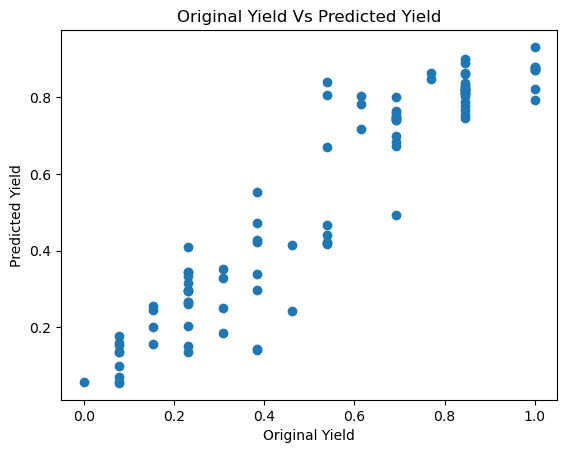

In [6]:
# Plotting Original Yield Vs Predicted Yield

plt.scatter(y, predictions)
plt.xlabel("Original Yield")
plt.ylabel("Predicted Yield")
plt.title("Original Yield Vs Predicted Yield")
plt.show()